In [1]:
import pyexcel as p
import openpyxl as xl

p.save_book_as(file_name='Dataset/employment/literacy_female.xls',
               dest_file_name='Dataset/employment/literacy_female.xlsx')

p.save_book_as(file_name='Dataset/employment/Employment_services_female.xls',
               dest_file_name='Dataset/employment/Employment_services_female.xlsx')

in_file ="Dataset/employment/literacy_female.xlsx"
oldwb = xl.load_workbook(in_file)
oldws = oldwb.worksheets[0]

in_file1 ="Dataset/employment/Employment_services_female.xlsx"
oldwb1 = xl.load_workbook(in_file1)
oldws1 = oldwb1.worksheets[0]

out_file = "Dataset/employment/literacy_services_female.xlsx"
newwb = xl.load_workbook(out_file)
newws = newwb.active 

i=2
#read from first file
for process_line in range(2,266):
	#3,267
	country_name=oldws.cell(row = process_line, column = 1).value
	for cols in range(3,63):
		#print(oldws.cell(row =2, column = cols).value)
		data_point=oldws.cell(row = process_line, column = cols).value
		if data_point!=None:
			for line in range(2,189):
				if oldws1.cell(row = line, column = 1).value==country_name:
					data_point_2=oldws1.cell(row = line, column = cols).value
					if data_point_2!=None:
					#save data point from both file
						newws.cell(row =i, column = 1).value = country_name
						newws.cell(row =i, column = 2).value = oldws.cell(row = 1, column = cols).value
						newws.cell(row =i, column = 3).value = data_point
						newws.cell(row =i, column = 4).value = data_point_2
						i=i+1
		
newwb.save(str(out_file))

#employment_agriculture is done

In [2]:
#calculating correlation coefficient 

import numpy as np
import pandas as pd

df = pd.read_excel('Dataset/employment/literacy_services_female.xlsx', index_col=0) 

In [3]:
correlated_features = set()
correlation_matrix = df.corr()

In [4]:
print(correlation_matrix)

                        Year  Literacy  Employ_Agriculture
Year                1.000000  0.202493            0.205167
Literacy            0.202493  1.000000            0.674085
Employ_Agriculture  0.205167  0.674085            1.000000


In [5]:
column_1 = df["Literacy"]
column_2 = df["Employ_Agriculture"]
correlation = column_1.corr(column_2)
print(correlation)

0.674084703490613


In [6]:
#heatmap of correlation matrix
import seaborn as sns
import matplotlib

ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
matplotlib.pyplot.savefig("Literacy vs employment")

In [25]:
import pyexcel as p
import openpyxl as xl

p.save_book_as(file_name='Dataset/employment/GenderEmploymentIndex.xlsx',
               dest_file_name='Dataset/employment/GenderEmploymentIndex.xlsx')


in_file ="Dataset/employment/GenderEmploymentIndex.xlsx"
oldwb = xl.load_workbook(in_file)
oldws = oldwb.worksheets[0]



in_file1 ="Dataset/employment/GPI_3_factors.xlsx"
oldwb1 = xl.load_workbook(in_file1)
oldws1 = oldwb1.worksheets[0]

out_file = "Dataset/employment/GPI_Gender_Employment_upper_middle.xlsx"
newwb = xl.load_workbook(out_file)
newws = newwb.active 

i=2
#read from first file
for process_line in range(2,189):
	#3,267
	country_name=oldws.cell(row = process_line, column = 1).value
	income_group=oldws.cell(row = process_line, column = 2).value
	if income_group=="Upper middle income":
		for cols in range(4,34):
			#print(oldws.cell(row =2, column = cols).value)
			year=oldws.cell(row = 1, column = cols).value
			data_point=oldws.cell(row = process_line, column = cols).value
			data_point_2=oldws1.cell(row = process_line, column = cols).value
			newws.cell(row =i, column = 1).value = country_name
			newws.cell(row =i, column = 2).value = income_group
			newws.cell(row =i, column = 3).value = year
			newws.cell(row =i, column = 4).value = data_point_2
			newws.cell(row =i, column = 5).value = data_point
			i=i+1



newwb.save(str(out_file))

Dataset/employment/GenderEmploymentIndex.xlsx


In [8]:
#calculating correlation coefficient 

import numpy as np
import pandas as pd

df1 = pd.read_excel('Dataset/employment/GPI_Gender_Employment_upper_middle.xlsx', index_col=0) 

In [9]:
correlated_features = set()
correlation_matrix1 = df1.corr()

In [10]:
print(correlation_matrix1)

                       Year       GPI  Gender_Employment
Year               1.000000  0.033229          -0.031184
GPI                0.033229  1.000000           0.850256
Gender_Employment -0.031184  0.850256           1.000000


In [11]:
column_1 = df1["GPI"]
column_2 = df1["Gender_Employment"]
correlation1 = column_1.corr(column_2)
print(correlation1)

0.8502556432207031


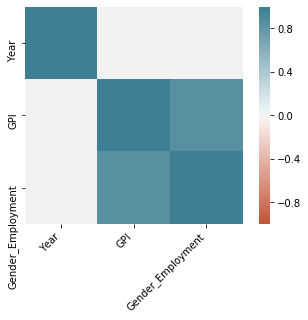

In [12]:
#heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(
    correlation_matrix1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("GPI vs Gender employment")

In [13]:
df_gpi=pd.read_excel('Dataset/employment/GPI_Gender_Employment_upper_middle.xlsx')

In [14]:

label_array = df1.index.unique()


In [15]:

UniqueNames = df1.index.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df1[:][df1.index == key]

In [16]:
len(DataFrameDict)

50

Correlation matrix for individual country

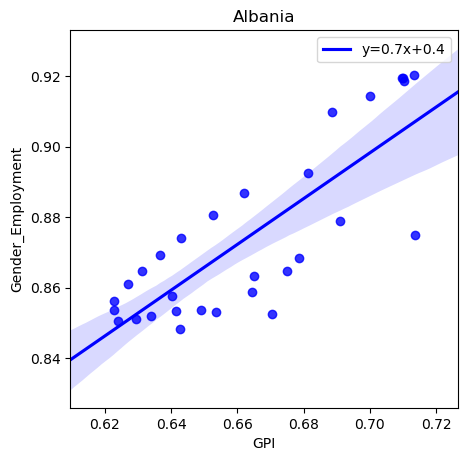

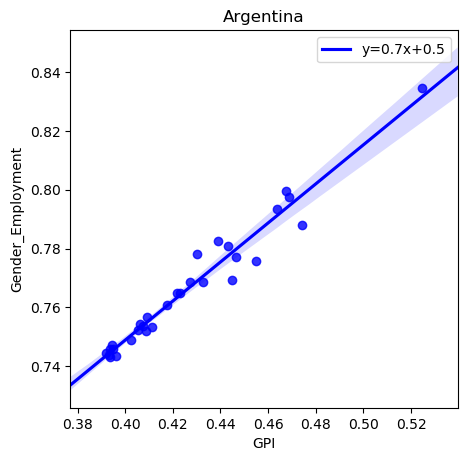

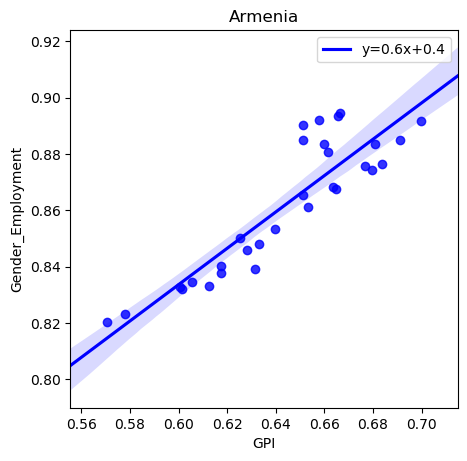

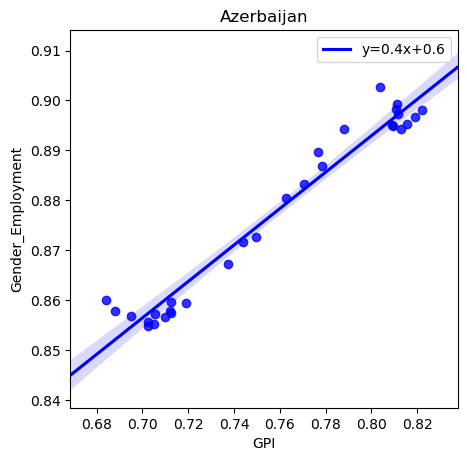

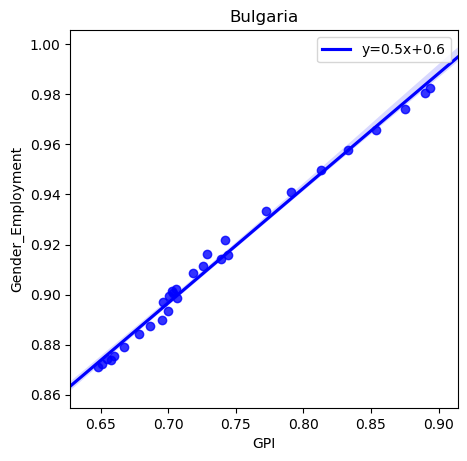

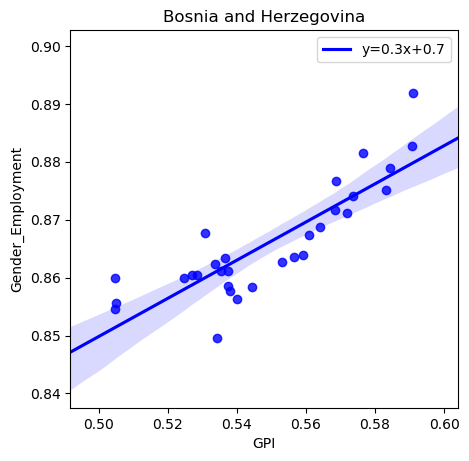

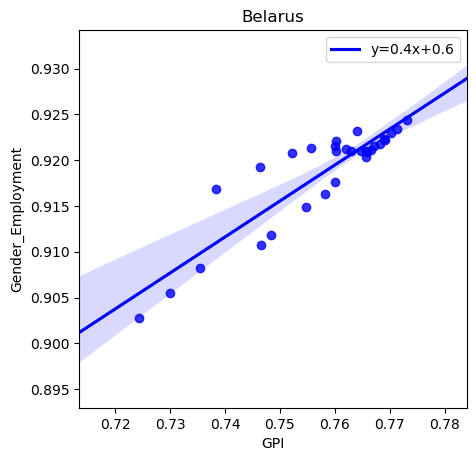

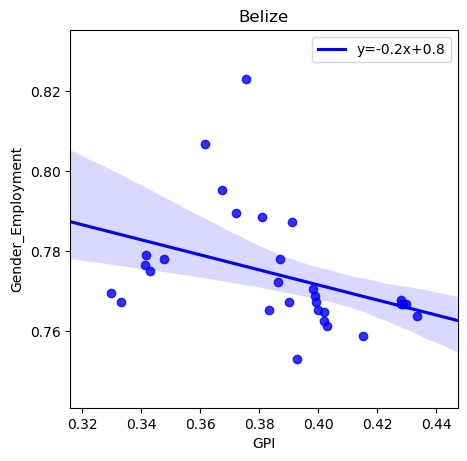

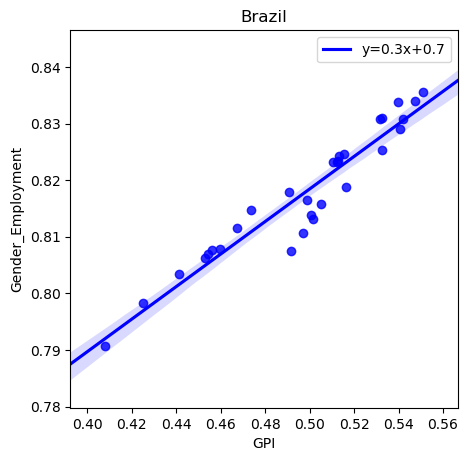

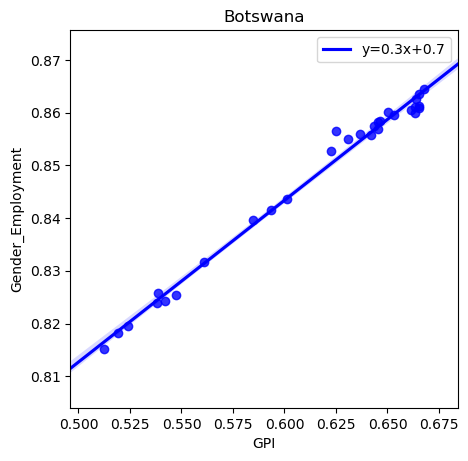

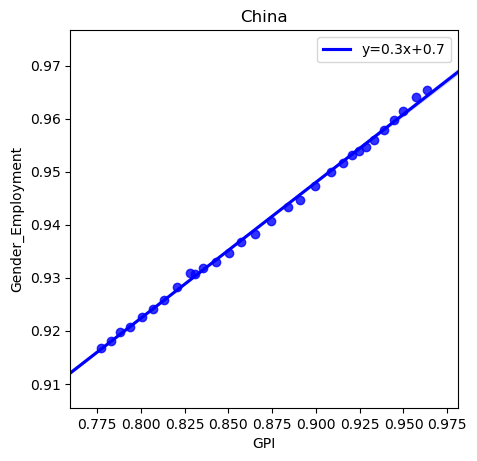

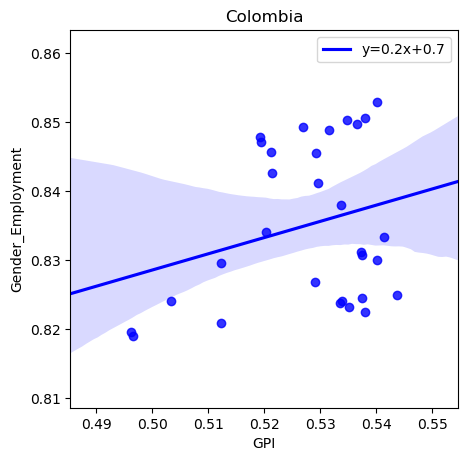

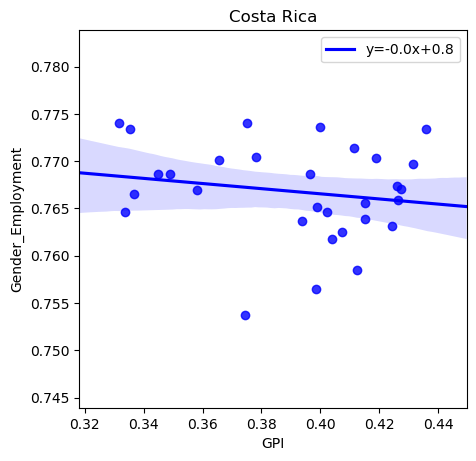

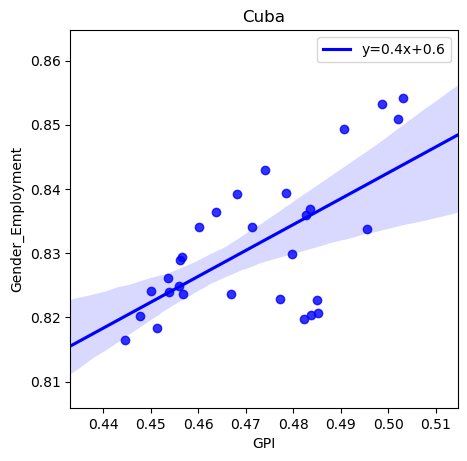

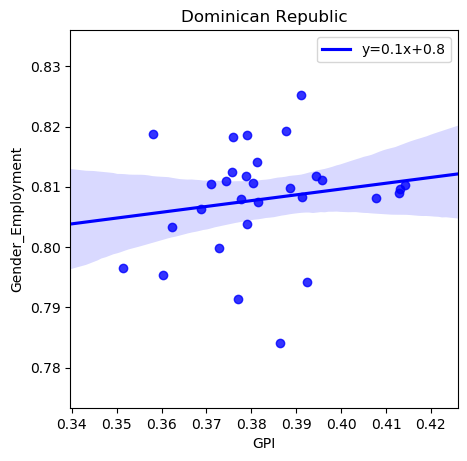

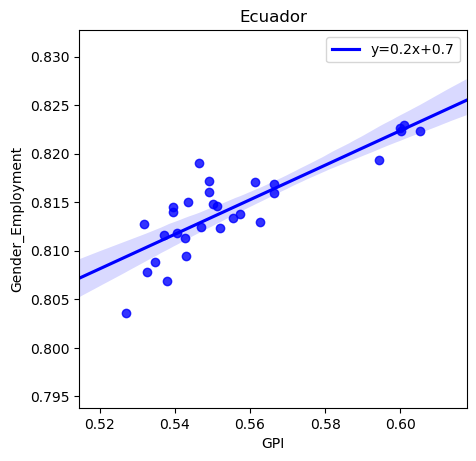

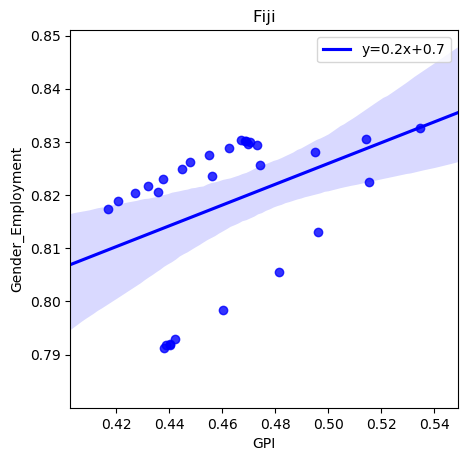

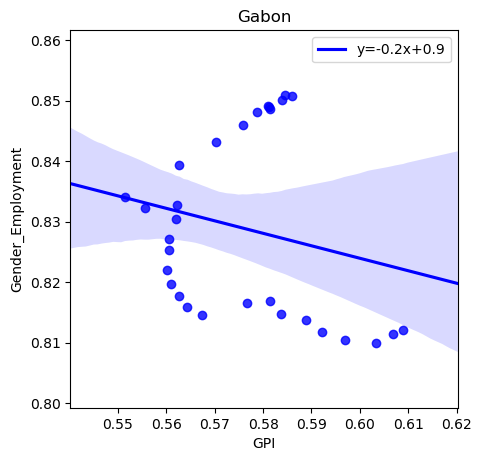

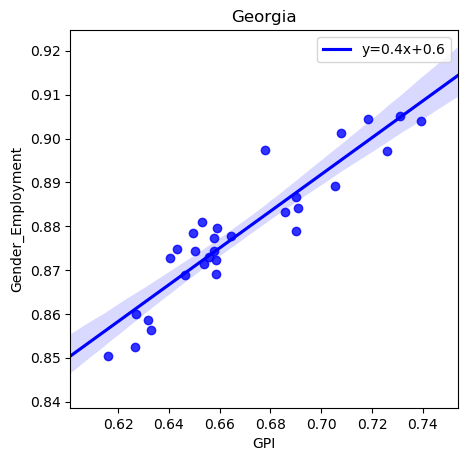

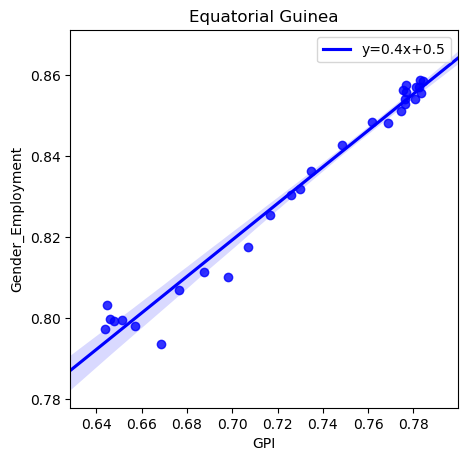

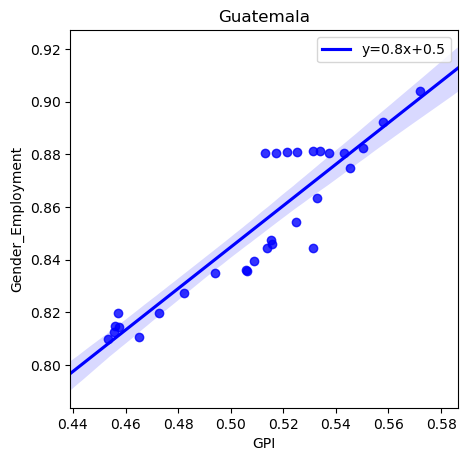

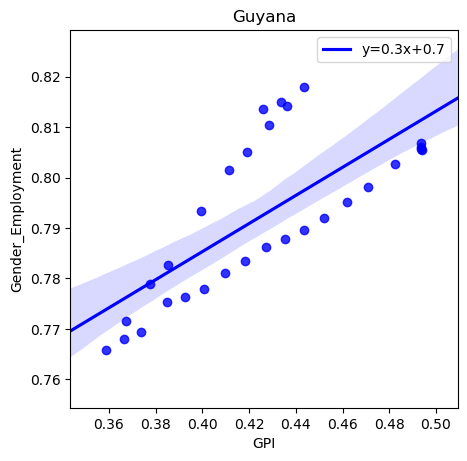

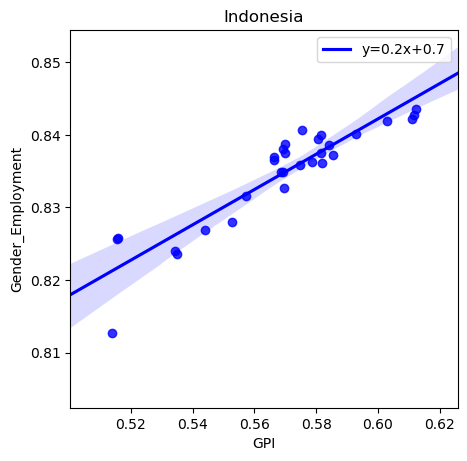

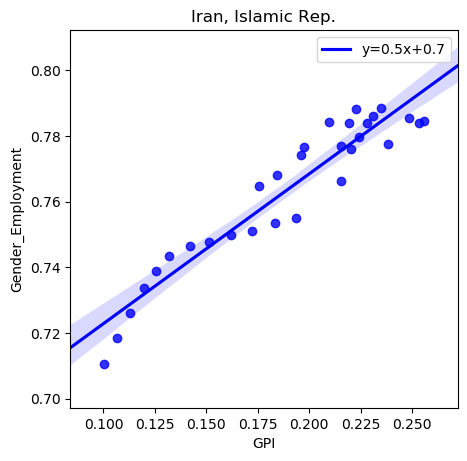

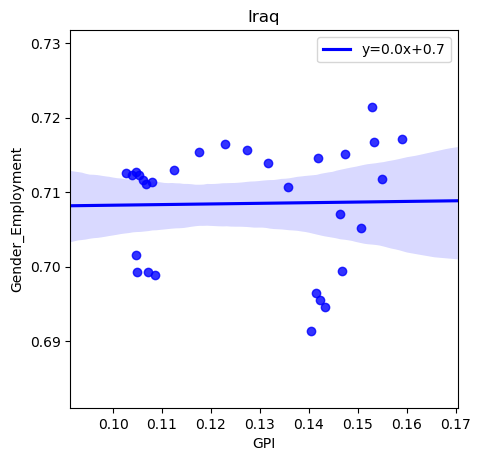

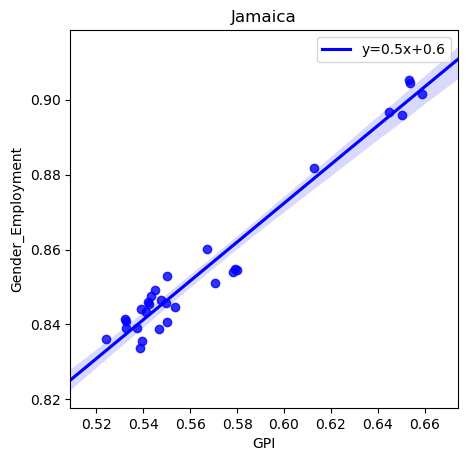

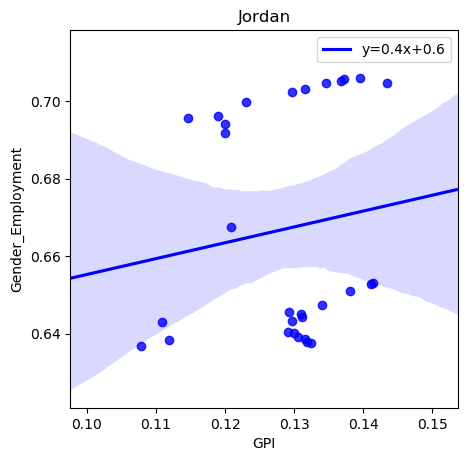

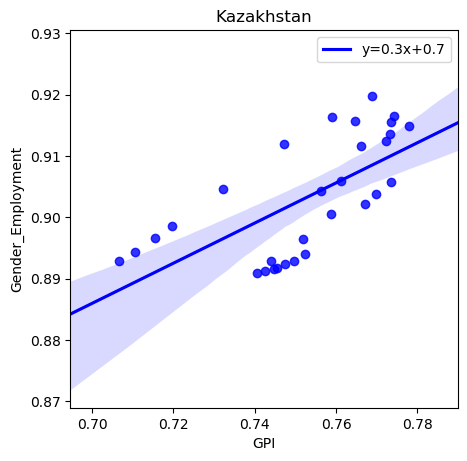

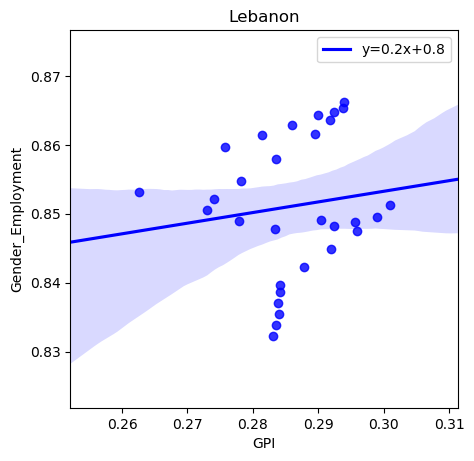

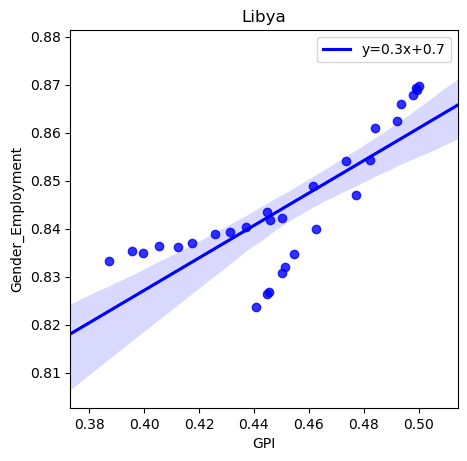

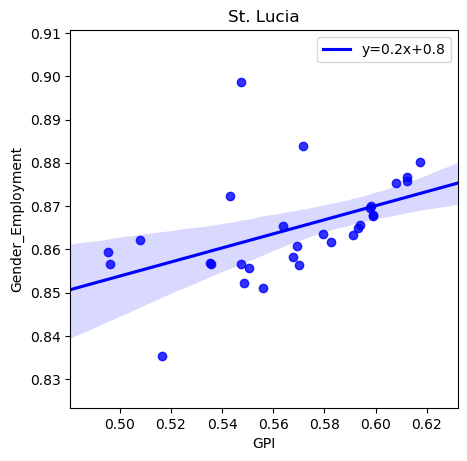

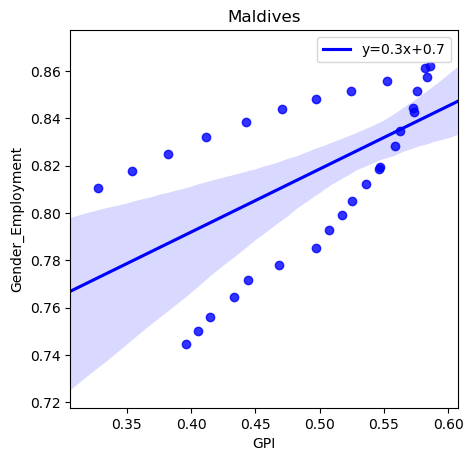

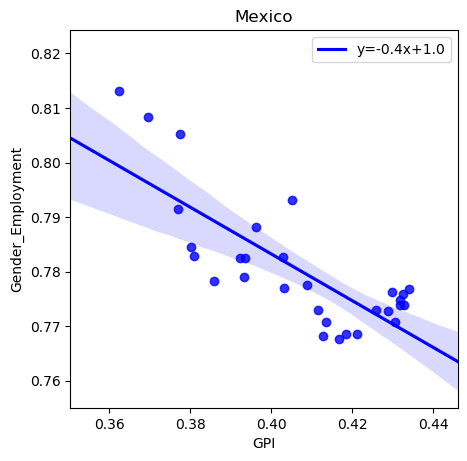

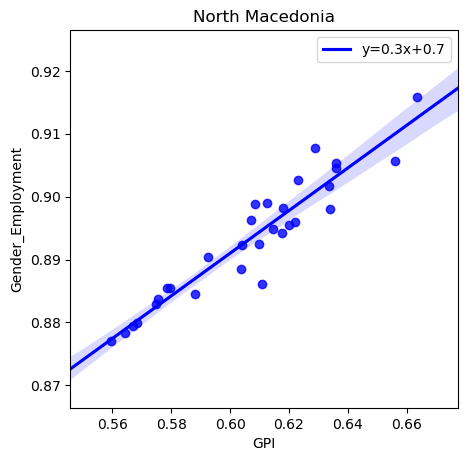

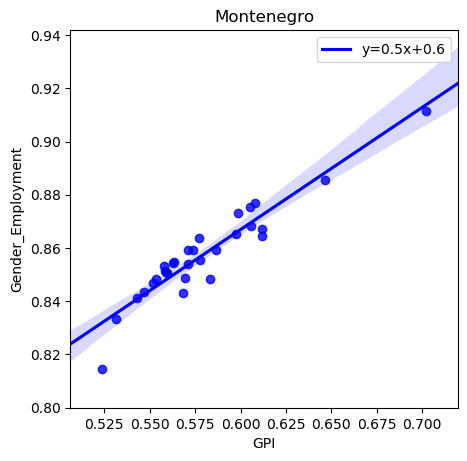

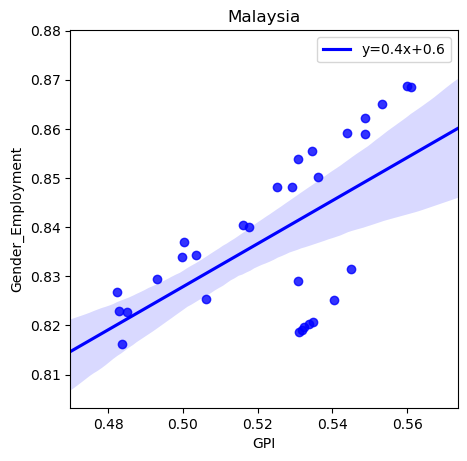

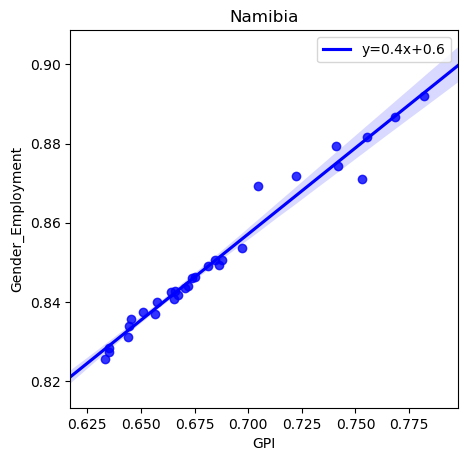

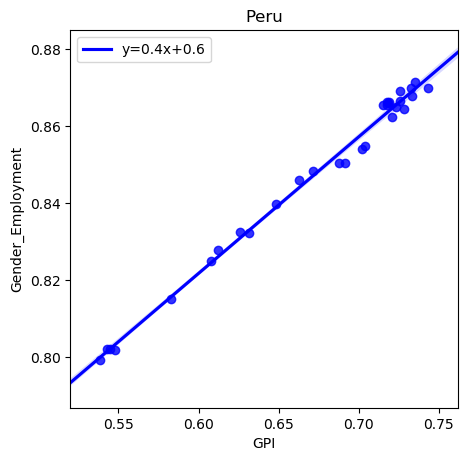

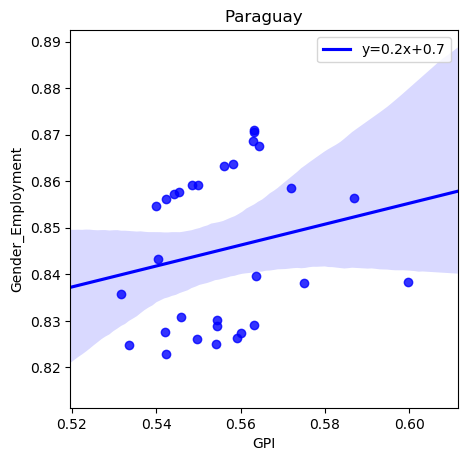

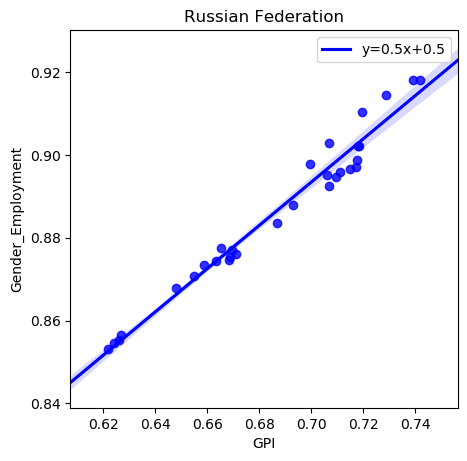

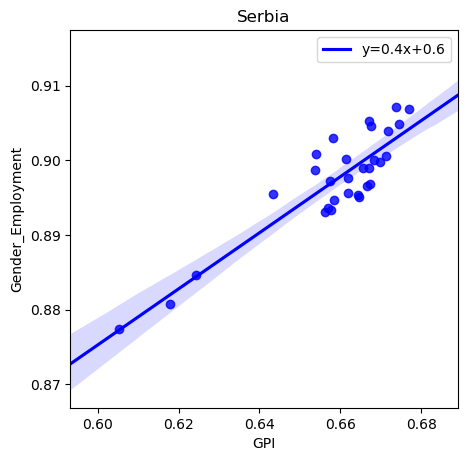

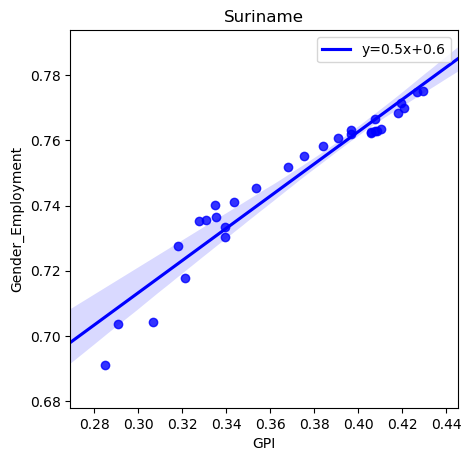

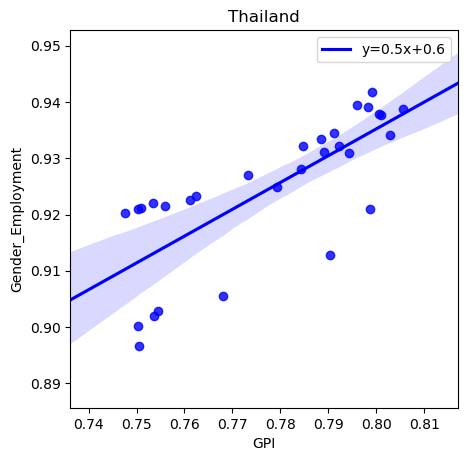

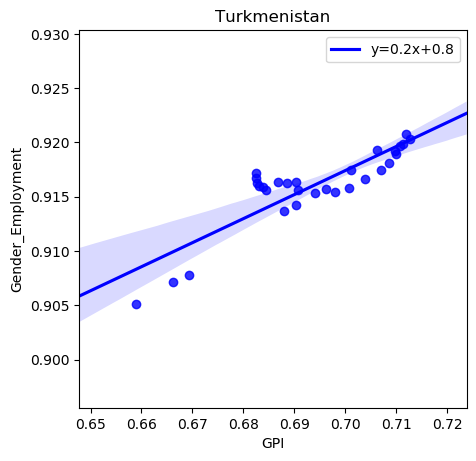

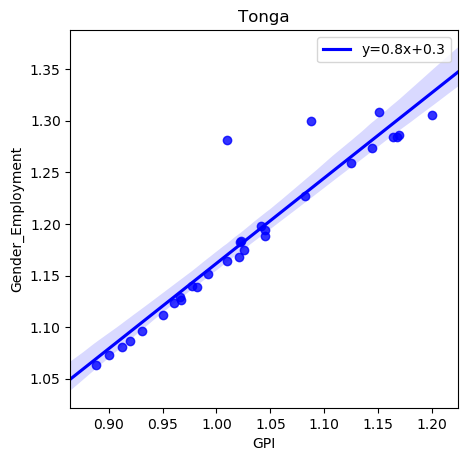

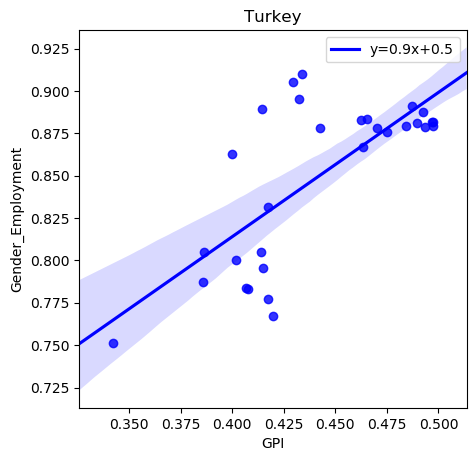

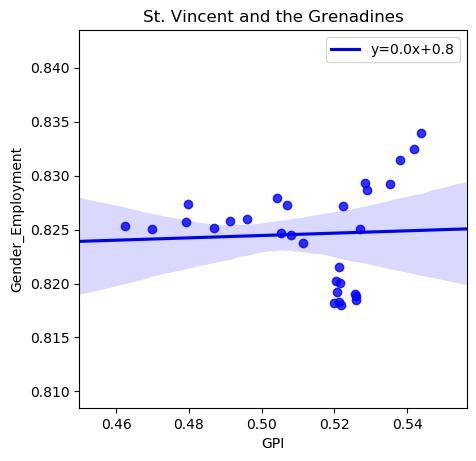

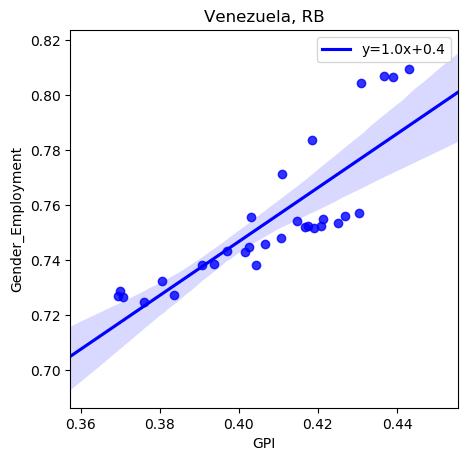

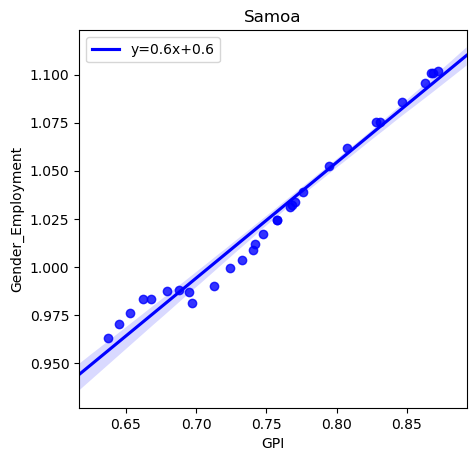

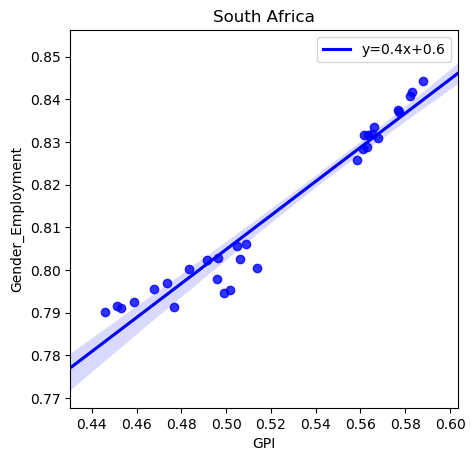

In [17]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

keys_list = list(DataFrameDict)
for i in range(len(keys_list)):
    df1=DataFrameDict[keys_list[i]]
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    slope, intercept, r_value, p_value, std_err = stats.linregress(df1['GPI'],df1['Gender_Employment'])
    ax = sns.regplot(x='GPI', y='Gender_Employment', data=df1,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.title(keys_list[i]);
    ax.legend()
    plt.savefig(str(keys_list[i])+"figure.png")
    plt.show()




In [18]:
import pandas as pd
df_economy_types = pd.read_excel("Dataset/employment/economy_types.xlsx")

In [19]:
print(df_economy_types)

    Country Code                      Region          IncomeGroup  \
0            AFG                  South Asia           Low income   
1            AGO          Sub-Saharan Africa  Lower middle income   
2            ALB       Europe & Central Asia  Upper middle income   
3            ARE  Middle East & North Africa          High income   
4            ARG   Latin America & Caribbean  Upper middle income   
5            ARM       Europe & Central Asia  Upper middle income   
6            AUS         East Asia & Pacific          High income   
7            AUT       Europe & Central Asia          High income   
8            AZE       Europe & Central Asia  Upper middle income   
9            BDI          Sub-Saharan Africa           Low income   
10           BEL       Europe & Central Asia          High income   
11           BEN          Sub-Saharan Africa  Lower middle income   
12           BFA          Sub-Saharan Africa           Low income   
13           BGD                  

In [21]:
print(df_gpi)

      Country_name         Income_group  Year       GPI  Gender_Employment
0          Albania  Upper middle income  1991  0.664991           0.863223
1          Albania  Upper middle income  1992  0.664567           0.858662
2          Albania  Upper middle income  1993  0.653707           0.853075
3          Albania  Upper middle income  1994  0.649168           0.853762
4          Albania  Upper middle income  1995  0.641363           0.853278
5          Albania  Upper middle income  1996  0.633962           0.852006
6          Albania  Upper middle income  1997  0.640241           0.857708
7          Albania  Upper middle income  1998  0.629427           0.851090
8          Albania  Upper middle income  1999  0.623840           0.850546
9          Albania  Upper middle income  2000  0.622639           0.853492
10         Albania  Upper middle income  2001  0.622897           0.856301
11         Albania  Upper middle income  2002  0.627083           0.861047
12         Albania  Upper

In [22]:
dict_GPI = {'Country_name' : df_gpi['Country_name'], 'Income_group' : df_gpi['Income_group'], 'Region' : df_economy_types['Region'],'GPI':df_gpi['GPI'],'Gender_Employment':df_gpi['Gender_Employment'] }

df_GenderEmploymentIndex = pd.DataFrame(dict_GPI)

In [47]:
df_contributing_female = pd.read_excel("Dataset/employment/Contributing_family _workers_female.xls")
region_df = pd.merge(df_economy_types, df_contributing_female, on='Country Code').loc[:,:'Country Name']
region_df = region_df.rename({'Country Name':'Country_name'}, axis='columns')


In [72]:
merged_df = pd.merge(df_gpi, region_df, on='Country_name').loc[:,:'Region']


In [139]:
df = merged_df.groupby(['Region','Year'])
df1 = df.first()
region_based_df = df1.drop(['Country_name','Country Code'], axis=1)

In [140]:
region_based_df = region_based_df.unstack()

In [141]:
region_based_df = region_based_df.unstack()

In [142]:
print(region_based_df)

                   Year  Region                    
Income_group       1991  East Asia & Pacific           Upper middle income
                         Europe & Central Asia         Upper middle income
                         Latin America & Caribbean     Upper middle income
                         Middle East & North Africa    Upper middle income
                         South Asia                    Upper middle income
                         Sub-Saharan Africa            Upper middle income
                   1992  East Asia & Pacific           Upper middle income
                         Europe & Central Asia         Upper middle income
                         Latin America & Caribbean     Upper middle income
                         Middle East & North Africa    Upper middle income
                         South Asia                    Upper middle income
                         Sub-Saharan Africa            Upper middle income
                   1993  East Asia & Pacific    

                          Country_name  Income_group  GPI  Gender_Employment  \
Region              Year                                                       
East Asia & Pacific 1991             7             7    7                  7   
                    1992             7             7    7                  7   
                    1993             7             7    7                  7   
                    1994             7             7    7                  7   
                    1995             7             7    7                  7   
                    1996             7             7    7                  7   
                    1997             7             7    7                  7   
                    1998             7             7    7                  7   
                    1999             7             7    7                  7   
                    2000             7             7    7                  7   
                    2001             7  

AttributeError: Cannot access callable attribute 'unstack' of 'SeriesGroupBy' objects, try using the 'apply' method

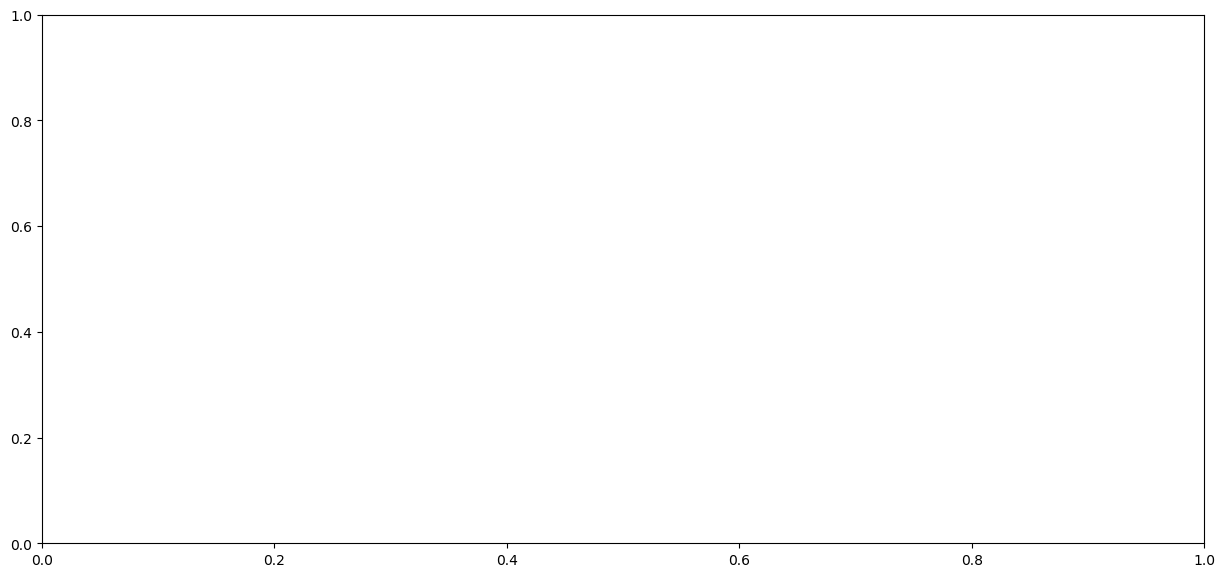

In [125]:
merged_df.groupby(['Region','Year'])